<h1 style="text-align: center;">Variable EMPLEADOS</h1>

Cargamos el DataSet

In [19]:
import pandas as pd

dataset_work_4 = pd.read_csv('D:\DataSet\dataset_work_5.csv')
x = dataset_work_4.iloc[:,:-1]
y = dataset_work_4.iloc[:,-1].values
dataset_work_4.columns

Index(['PERIODO', 'MONTO_IMPONIBLE_LOG', 'IMPUESTO_TOTAL_LOG',
       'TIENE_INCENTIVO_FISCAL', 'INCENTIVO_FISCAL_MONTO_IMP', 'PERCEPCIONES',
       'RETENCIONES', 'EMPLEADOS', 'PROVINCIA', 'LOCALIDAD', 'CONDICION_AFIP',
       'TAMANO', 'ACTIVIDAD_YJ', 'INFLACION', 'MOROSIDAD'],
      dtype='object')

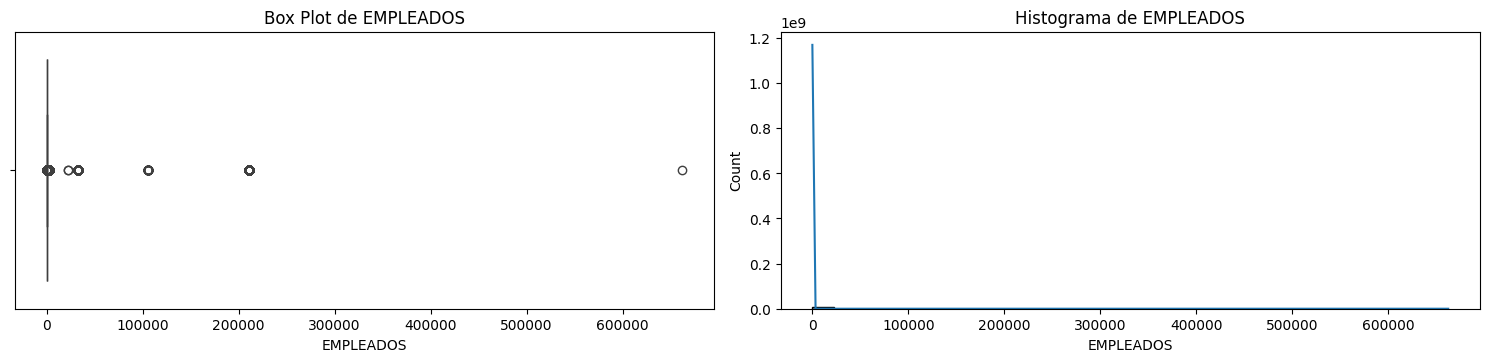

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
#import scipy.stats as stats

# Configurar el tamaño de la figura para contener todos los gráficos
plt.figure(figsize=(15, 10))

# Crear el diagrama de caja (box plot)
plt.subplot(3, 2, 1)  # 3 filas, 2 columnas, primer gráfico
sns.boxplot(x=dataset_work_4['EMPLEADOS'])
plt.title('Box Plot de EMPLEADOS')

# Crear el histograma
plt.subplot(3, 2, 2)  # 3 filas, 2 columnas, segundo gráfico
sns.histplot(dataset_work_4['EMPLEADOS'], bins=30, kde=True)
plt.title('Histograma de EMPLEADOS')


# Ajustar el espaciado para que los gráficos no se superpongan
plt.tight_layout()

# Mostrar todos los gráficos
plt.show()

In [21]:
def calcular_estadisticas_completas(df, columna):
    # Obtener estadísticas básicas con describe()
    estadisticas = dataset_work_4[columna].describe()
    
    # Calcular estadísticas adicionales
    estadisticas['asimetria'] = df[columna].skew()
    estadisticas['curtosis'] = df[columna].kurtosis()
    estadisticas['varianza'] = df[columna].var()
    
    return estadisticas

# Llamada a la función
estadisticas_completas = calcular_estadisticas_completas(dataset_work_4, 'EMPLEADOS')
display(estadisticas_completas)

count        6.435903e+06
mean         7.302819e+00
std          1.112125e+03
min          0.000000e+00
25%          0.000000e+00
50%          0.000000e+00
75%          0.000000e+00
max          6.623450e+05
asimetria    2.043760e+02
curtosis     5.154676e+04
varianza     1.236823e+06
Name: EMPLEADOS, dtype: float64

In [22]:
# Lista de variables numéricas a analizar
variables = ['EMPLEADOS']
outliers_summary = {}

# Calcular outliers usando IQR para cada variable
for variable in variables:
    Q1 = dataset_work_4[variable].quantile(0.25)
    Q3 = dataset_work_4[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtrar outliers
    outliers = dataset_work_4[(dataset_work_4[variable] < lower_bound) | (dataset_work_4[variable] > upper_bound)]
    
    # Guardar resultados en un diccionario
    outliers_summary[variable] = {
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Number of Outliers': len(outliers)
    }

# Convertir el resumen de outliers en un DataFrame para una mejor visualización
outliers_summary_dataset_work_4 = pd.DataFrame(outliers_summary).T

print(outliers_summary_dataset_work_4)

           Lower Bound  Number of Outliers  Upper Bound
EMPLEADOS          0.0           1059512.0          0.0


In [23]:
# Contamos cuántas veces aparece cada valor en la variable EMPLEADOS
conteo_empleados = dataset_work_4['EMPLEADOS'].value_counts().sort_index()

# Añadimos etiquetas más descriptivas para cada valor
conteo_empleados_etiquetado = conteo_empleados.rename_axis('Cantidad de EMPLEADOS').reset_index(name='Frecuencia')

# Mostramos los primeros valores del conteo con etiquetas
print("\nValores de EMPLEADOS con sus respectivas frecuencias:")
print(conteo_empleados_etiquetado)  # Mostramos solo los primeros valores



Valores de EMPLEADOS con sus respectivas frecuencias:
     Cantidad de EMPLEADOS  Frecuencia
0                        0     5376391
1                        1      562028
2                        2      187690
3                        3       89849
4                        4       53816
..                     ...         ...
134                  21933           2
135                  32450         121
136                 105700          39
137                 211153         156
138                 662345           1

[139 rows x 2 columns]


## Creamos la variable TIENE_EMPLEADOS


Creamos una variable binaria que indique si el valor de EMPLEADOS es cero o mayor que cero donde Ceros (empresas sin empleados) y Uno posee por lo menos un empleado.



In [24]:
import numpy as np

# Crear una variable binaria para indicar la presencia de empleados
dataset_work_4['TIENE_EMPLEADOS'] = np.where(dataset_work_4['EMPLEADOS'] > 0, 1, 0)

dataset_work_4.columns

Index(['PERIODO', 'MONTO_IMPONIBLE_LOG', 'IMPUESTO_TOTAL_LOG',
       'TIENE_INCENTIVO_FISCAL', 'INCENTIVO_FISCAL_MONTO_IMP', 'PERCEPCIONES',
       'RETENCIONES', 'EMPLEADOS', 'PROVINCIA', 'LOCALIDAD', 'CONDICION_AFIP',
       'TAMANO', 'ACTIVIDAD_YJ', 'INFLACION', 'MOROSIDAD', 'TIENE_EMPLEADOS'],
      dtype='object')

In [25]:
# Lista de variables numéricas a analizar
variables = ['EMPLEADOS', 'TIENE_EMPLEADOS']
outliers_summary = {}

# Calcular outliers usando IQR para cada variable
for variable in variables:
    Q1 = dataset_work_4[variable].quantile(0.25)
    Q3 = dataset_work_4[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtrar outliers
    outliers = dataset_work_4[(dataset_work_4[variable] < lower_bound) | (dataset_work_4[variable] > upper_bound)]
    
    # Guardar resultados en un diccionario
    outliers_summary[variable] = {
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Number of Outliers': len(outliers)
    }

# Convertir el resumen de outliers en un DataFrame para una mejor visualización
outliers_summary_dataset_work_4 = pd.DataFrame(outliers_summary).T

print(outliers_summary_dataset_work_4)

                 Lower Bound  Upper Bound  Number of Outliers
EMPLEADOS                0.0          0.0           1059512.0
TIENE_EMPLEADOS          0.0          0.0           1059512.0


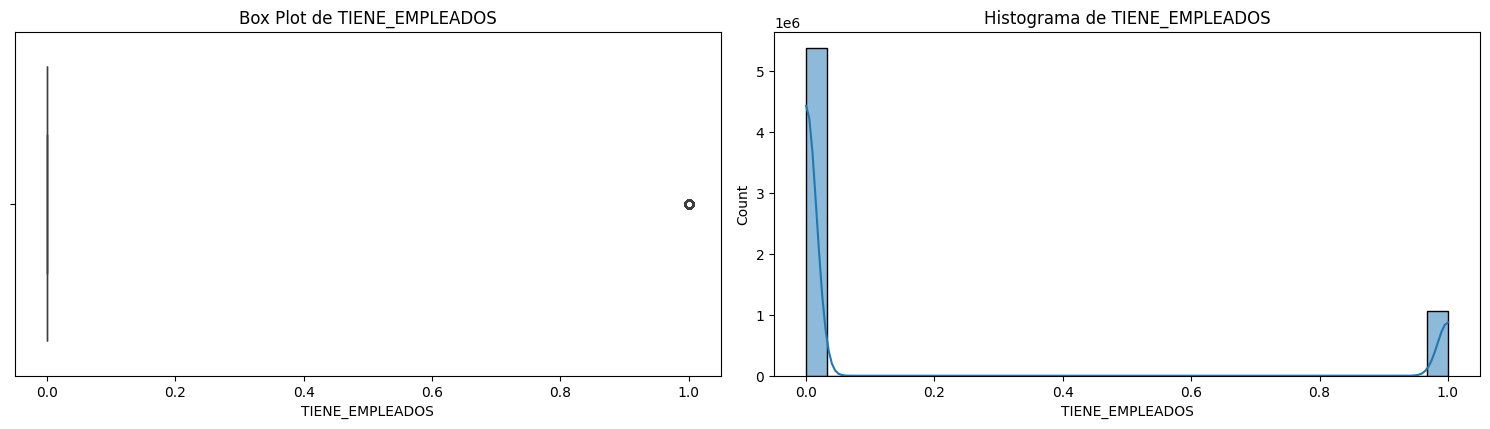

In [26]:
# Configurar el tamaño de la figura para contener todos los gráficos
plt.figure(figsize=(15, 12))

# Crear el primer diagrama de caja (Box Plot de EMPLEADOS)
plt.subplot(3, 2, 1)  # 4 filas, 2 columnas, primer gráfico
sns.boxplot(x=dataset_work_4['TIENE_EMPLEADOS'])
plt.title('Box Plot de TIENE_EMPLEADOS')

# Crear el primer histograma (Histograma de EMPLEADOS)
plt.subplot(3, 2, 2)  # 4 filas, 2 columnas, segundo gráfico
sns.histplot(dataset_work_4['TIENE_EMPLEADOS'], bins=30, kde=True)
plt.title('Histograma de TIENE_EMPLEADOS')


# Ajustar el espaciado para que los gráficos no se superpongan
plt.tight_layout()

# Mostrar todos los gráficos
plt.show()

In [27]:
# Contamos cuántas veces aparece cada valor en la variable EMPLEADOS
conteo_empleados = dataset_work_4['TIENE_EMPLEADOS'].value_counts().sort_index()

# Añadimos etiquetas más descriptivas para cada valor
conteo_empleados_etiquetado = conteo_empleados.rename_axis('Cantidad de TIENE_EMPLEADOS').reset_index(name='Frecuencia')

# Mostramos los primeros valores del conteo con etiquetas
print("\nValores de EMPLEADOS con sus respectivas frecuencias:")
print(conteo_empleados_etiquetado)  # Mostramos solo los primeros valores


Valores de EMPLEADOS con sus respectivas frecuencias:
   Cantidad de TIENE_EMPLEADOS  Frecuencia
0                            0     5376391
1                            1     1059512


## Creamos la variable **IMPUESTO_POR_EMPLEADOS**

**Combinamos la variable EMPLEADOS** con los impuestos para crear una nueva variable que indique el "impuestos por empleado".


In [28]:
# Crear una nueva variable que combine IMPUESTO_TOTAL_LOG con EMPLEADOS
# Para evitar división por cero, usamos un valor muy pequeño (epsilon) cuando EMPLEADOS es 0.
epsilon = 1e-6
dataset_work_4['IMPUESTO_POR_EMPLEADO'] = dataset_work_4['IMPUESTO_TOTAL_LOG'] / (dataset_work_4['EMPLEADOS'] + epsilon)

# Verificar los resultados
print(dataset_work_4[['EMPLEADOS', 'IMPUESTO_TOTAL_LOG', 'IMPUESTO_POR_EMPLEADO']].head())

   EMPLEADOS  IMPUESTO_TOTAL_LOG  IMPUESTO_POR_EMPLEADO
0          0            0.000000           0.000000e+00
1          0            0.000000           0.000000e+00
2          0            5.885771           5.885771e+06
3          0            5.571393           5.571393e+06
4          0            0.000000           0.000000e+00


In [29]:
dataset_work_4.columns

Index(['PERIODO', 'MONTO_IMPONIBLE_LOG', 'IMPUESTO_TOTAL_LOG',
       'TIENE_INCENTIVO_FISCAL', 'INCENTIVO_FISCAL_MONTO_IMP', 'PERCEPCIONES',
       'RETENCIONES', 'EMPLEADOS', 'PROVINCIA', 'LOCALIDAD', 'CONDICION_AFIP',
       'TAMANO', 'ACTIVIDAD_YJ', 'INFLACION', 'MOROSIDAD', 'TIENE_EMPLEADOS',
       'IMPUESTO_POR_EMPLEADO'],
      dtype='object')

In [31]:
# Asegúrate de que las columnas de tu DataFrame estén en el orden correcto y eliminando las que no necesites
columns_order = ['PERIODO', 'MONTO_IMPONIBLE_LOG', 'IMPUESTO_TOTAL_LOG',
       'TIENE_INCENTIVO_FISCAL', 'INCENTIVO_FISCAL_MONTO_IMP', 'PERCEPCIONES',
       'RETENCIONES', 'EMPLEADOS', 'TIENE_EMPLEADOS',
       'IMPUESTO_POR_EMPLEADO', 'PROVINCIA', 'LOCALIDAD', 'CONDICION_AFIP',
       'TAMANO', 'ACTIVIDAD_YJ', 'INFLACION', 'MOROSIDAD']

# Reorganizar las columnas del DataFrame
dataset_work_4 = dataset_work_4[columns_order]

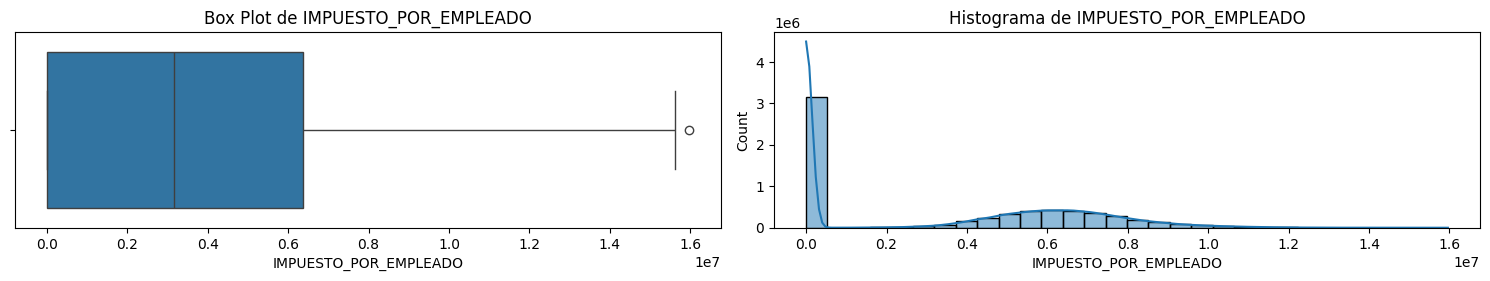

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el tamaño de la figura para contener todos los gráficos
plt.figure(figsize=(15, 12))


# Crear el cuarto diagrama de caja (Box Plot de EMPLEADOS_LOG_CAPPED)
plt.subplot(5, 2, 9)  # 4 filas, 2 columnas, séptimo gráfico
sns.boxplot(x=dataset_work_4['IMPUESTO_POR_EMPLEADO'])
plt.title('Box Plot de IMPUESTO_POR_EMPLEADO')

# Crear el cuarto histograma (Histograma de EMPLEADOS_LOG_CAPPED)
plt.subplot(5, 2, 10)  # 4 filas, 2 columnas, octavo gráfico
sns.histplot(dataset_work_4['IMPUESTO_POR_EMPLEADO'], bins=30, kde=True)
plt.title('Histograma de IMPUESTO_POR_EMPLEADO')


# Ajustar el espaciado para que los gráficos no se superpongan
plt.tight_layout()

# Mostrar todos los gráficos
plt.show()

In [33]:
# Copiar el dataset actual a dataset_work_4
dataset_work_5 = dataset_work_4.copy()

# Eliminar las columnas especificadas
columnas_a_eliminar = ['EMPLEADOS']

# Usamos el método drop() para eliminar las columnas
dataset_work_5.drop(columns=columnas_a_eliminar, inplace=True)

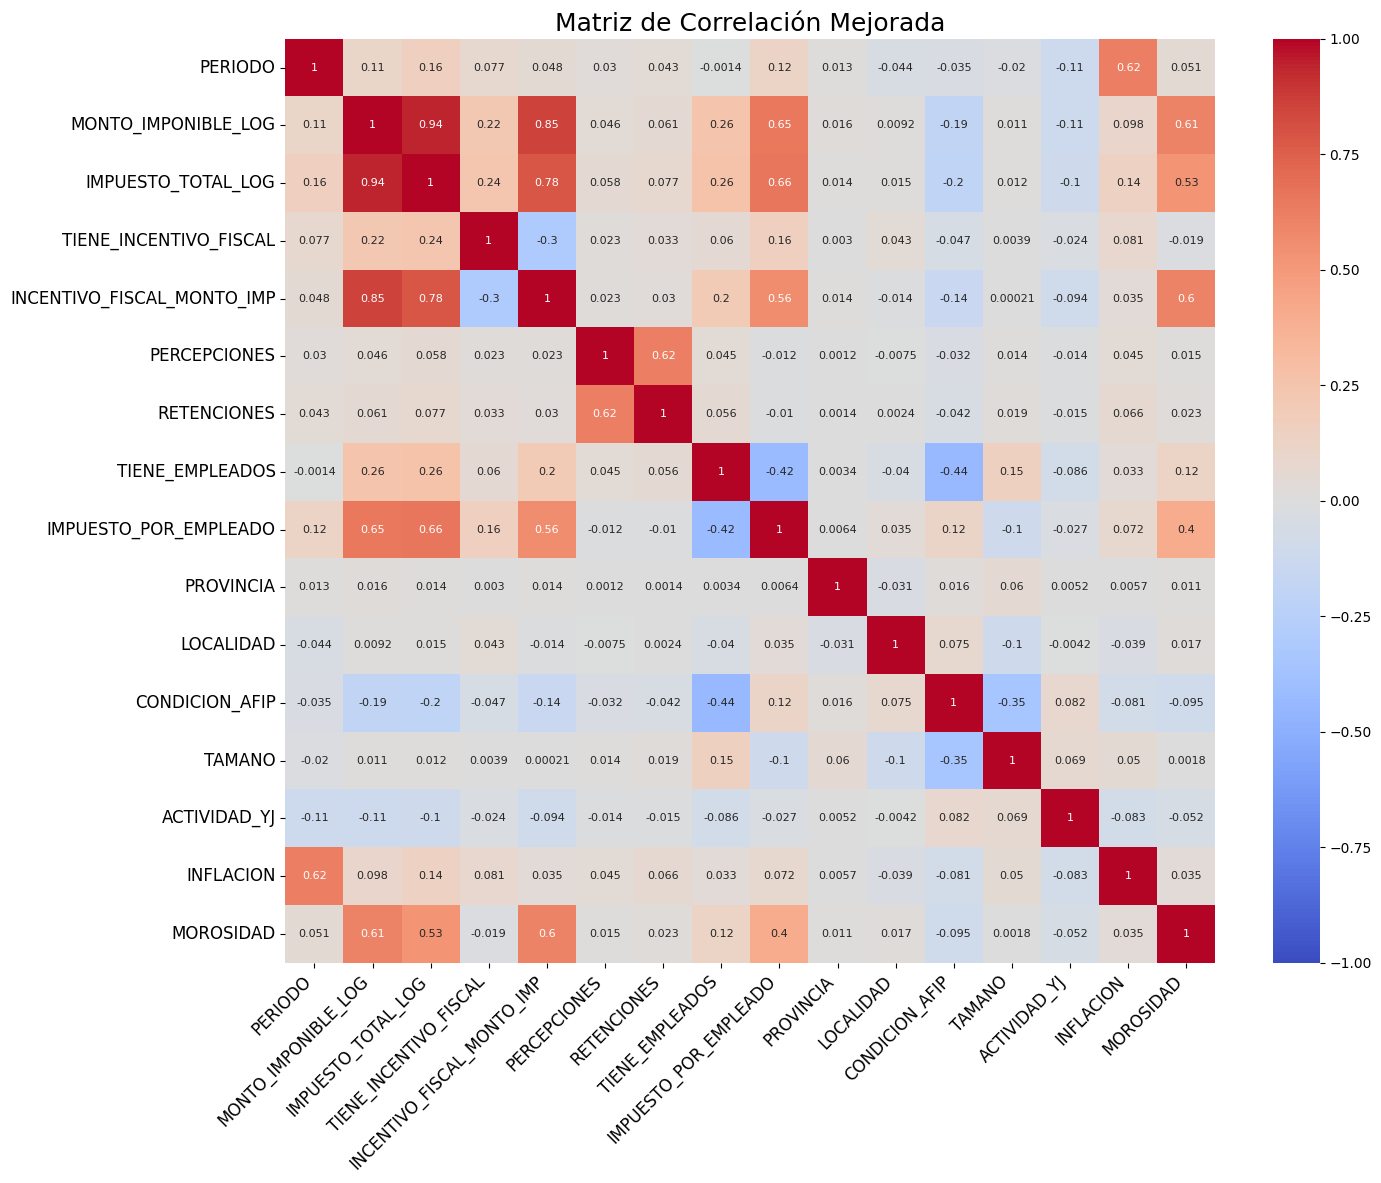

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculamos la matriz de correlación
correlation_matrix = dataset_work_5.corr()

# Ajustamos el tamaño de la figura y el tamaño de los números
plt.figure(figsize=(15, 12))  # Aumentamos el tamaño del gráfico
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 8})  # Ajustamos el tamaño de las anotaciones
plt.title('Matriz de Correlación Mejorada', fontsize=18)  # Título más grande
plt.xticks(rotation=45, ha="right", fontsize=12)  # Rotamos y ajustamos las etiquetas del eje X
plt.yticks(fontsize=12)  # Ajustamos las etiquetas del eje Y
plt.show()

### Resguardamos el DataSet

Resguardamos el dataset resultante en un nuevo archivo para poder seguir procesandolo.

In [35]:
# Especifica el nombre del archivo CSV donde se guardarán los datos
output_file = 'D:\DataSet\dataset_work_6.csv'

# Guarda el DataFrame en un archivo CSV
dataset_work_5.to_csv(output_file, index=False, encoding='utf-8')

# Mensaje de confirmación
print(f'DataFrame guardado en {output_file}')

DataFrame guardado en D:\DataSet\dataset_work_6.csv
